In [7]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
import numpy as np

ibmqfactory.load_account:WARNING:2021-04-04 12:33:56,479: Credentials are already in use. The existing account in the session will be replaced.


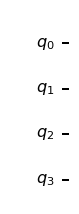

In [11]:
#Creating Oracle
n=3
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(n+1)

if output == 1:
    const_oracle.x(n)

const_oracle.draw()
    

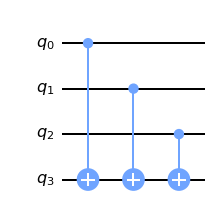

In [12]:
#creating balanced oracle
balanced_oracle = QuantumCircuit(n+1)
for qubit in range(n):
    balanced_oracle.cx(qubit,n)
    
balanced_oracle.draw('mpl')

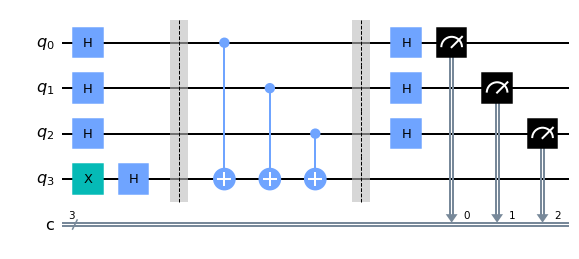

In [21]:
dj_circ = QuantumCircuit(n+1,n)
#Apply hadamard gates to first n qubits
for qubit in range(n):
    dj_circ.h(qubit)
#applying x to the bottommost qubit and applying hadamard to it
dj_circ.x(n)
dj_circ.h(n)


#placing barrier after that
dj_circ.barrier()

dj_circ+=balanced_oracle
dj_circ.barrier()


#applying hadamard again

for qubit in range(n):
    dj_circ.h(qubit)


#adding the measurement part
for m in range(n):
    dj_circ.measure(m,m)

dj_circ.draw('mpl')

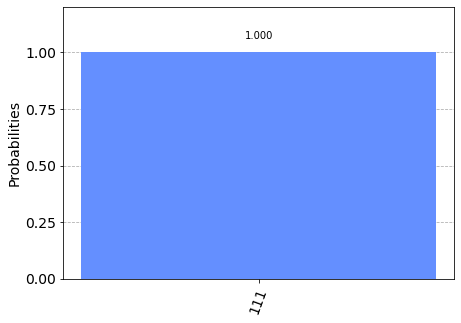

In [23]:
#running local simulator

qasm_sim = Aer.get_backend('qasm_simulator')
shots =1
#run circuit on simulator and then get the result
results = qasm_sim.run(assemble(dj_circ,qasm_sim)).result()
ans = results.get_counts()

#P(0000.00) = 1 for constant
#p(0000000) = 0 for balanced

plot_histogram(ans)




In [25]:
from qiskit.providers.ibmq import least_busy

#Loading your ibmq accounts
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits>=(n+1)and not x.configuration().simulator and x.status().operational == True))
print("Least busy backend:",backend)

ibmqfactory.load_account:WARNING:2021-04-04 14:48:19,749: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibmq_santiago


In [27]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circ = transpile(dj_circ,backend,optimization_level=3)
job = backend.run(assemble(transpiled_dj_circ,backend))
job_monitor(job,interval = 2)


<ipython-input-27-c5afd6066764>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(assemble(transpiled_dj_circ,backend))


Job Status: job has successfully run


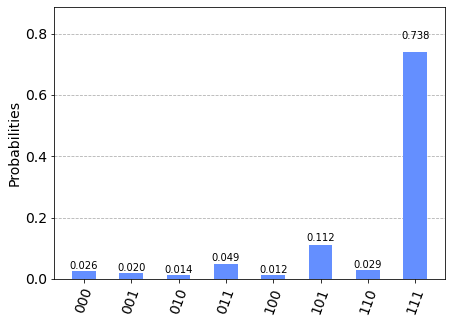

In [28]:
#getting the results of computation
results = job.result()
ans = results.get_counts()
plot_histogram(ans)

Traceback (most recent call last):
  File "<ipython-input-1-50152abd14ec>", line 4, in <module>
    provider = IBMQ.load_account()
NameError: name 'IBMQ' is not defined

Use %tb to get the full traceback.
